<h1>Weather Data in Seattle from 1948 to 2017</h1>

In [1]:
# Render plots inline as output 
%matplotlib inline

# global installs for required packages, very common to see these aliased as so
#NOTE: Rerun the complete notebook any time you change the installs
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import date

In [2]:
# read in the weather data file with pandas, df is common name for reading in a file
df = pd.read_csv('./seattleWeather_1948-2017.csv')
df.head()

DATE  PRCP  TMAX  TMIN  RAIN
0  1948-01-01  0.47    51    42  True
1  1948-01-02  0.59    45    36  True
2  1948-01-03  0.42    45    35  True
3  1948-01-04  0.31    45    34  True
4  1948-01-05  0.17    45    32  True

In [3]:
# reset this column to have datetime object types
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

In [4]:
# create new columns for data parsing by date information
df['DAY_NAME'] = df['DATE'].dt.weekday_name
df['DAY_OF_WEEK'] = df['DATE'].apply(date.isoweekday)
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['DAY'] = df['DATE'].dt.day
#change rain column from T/F to 1/0
df['RAIN'] = df['RAIN'].apply(lambda x: 1 if x is True else 0)

In [5]:
df.head()

DATE  PRCP  TMAX  TMIN  RAIN  DAY_NAME  DAY_OF_WEEK  MONTH  YEAR  DAY
0 1948-01-01  0.47    51    42     1  Thursday            4      1  1948    1
1 1948-01-02  0.59    45    36     1    Friday            5      1  1948    2
2 1948-01-03  0.42    45    35     1  Saturday            6      1  1948    3
3 1948-01-04  0.31    45    34     1    Sunday            7      1  1948    4
4 1948-01-05  0.17    45    32     1    Monday            1      1  1948    5

# Weather Data in Seattle from 1948 to 2017
# 1. How many days since 1947 has it rained (1) vs not (0)

In [6]:
diff = pd.DataFrame(df['RAIN'].groupby(df.RAIN).count())
diff

RAIN
RAIN       
0     14651
1     10900

# 2. What's the count of rainy days by day of the week?

In [22]:
rain = df[df.RAIN == True].groupby(df.DAY_NAME)
rain['DAY_NAME'].count()

DAY_NAME
Friday       1559
Monday       1568
Saturday     1584
Sunday       1564
Thursday     1552
Tuesday      1561
Wednesday    1512
Name: DAY_NAME, dtype: int64

# 3. What's the count of rainy days by months of the year?

In [8]:
months_wet = df[df.RAIN == True].groupby(df.MONTH)
months_wet['MONTH'].count()

MONTH
1     1298
2     1103
3     1212
4      998
5      771
6      632
7      343
8      413
9      609
10     950
11    1264
12    1307
Name: MONTH, dtype: int64

# 4. What's the total rainfall per year?

In [9]:
prcp_yearly = df[['YEAR', 'PRCP']].groupby(df.YEAR)
sum_prcp = pd.DataFrame(prcp_yearly['PRCP'].sum())
sum_prcp.head()

PRCP
YEAR       
1948  45.79
1949  32.46
1950  55.14
1951  40.30
1952  23.78

In [10]:
sum_prcp.sort_values('PRCP')

PRCP
YEAR       
1952  23.78
1985  25.13
1976  26.70
2000  28.66
1993  28.80
1987  29.93
2008  30.73
2004  31.10
2002  31.36
1979  32.26
1949  32.46
2013  32.56
1992  32.78
1977  32.84
1988  32.98
1965  33.56
1969  33.73
1978  33.99
1957  34.63
1989  34.69
1994  34.82
1973  35.04
1981  35.40
1991  35.42
2005  35.44
1967  35.58
1980  35.60
1962  35.79
2011  36.39
1956  36.85
...     ...
1982  39.32
1951  40.30
1983  40.93
1954  41.27
1964  41.34
2003  41.78
1999  42.11
1961  42.53
1995  42.60
1958  42.63
1971  43.21
1997  43.26
2017  43.55
1998  44.06
1975  44.48
1990  44.75
2015  44.83
2016  45.18
1948  45.79
1959  46.52
1955  46.61
2010  46.99
2012  48.26
1972  48.36
2006  48.42
2014  48.50
1953  49.42
1968  50.15
1996  50.67
1950  55.14

[70 rows x 1 columns]

## Probability

### What's the probability that is will Rain on any given day in Seattle?

In [11]:
df['RAIN'].sum() / df.count()

DATE           0.426598
PRCP           0.426648
TMAX           0.426598
TMIN           0.426598
RAIN           0.426598
DAY_NAME       0.426598
DAY_OF_WEEK    0.426598
MONTH          0.426598
YEAR           0.426598
DAY            0.426598
dtype: float64

### What's the probability it will rain on April 1st?

In [12]:
# df.loc[df['MONTH'] == 4 & df['DAY'] == 1]
apr1 = df[df.MONTH == 4][df.DAY ==1]
perc = apr1['RAIN'].sum() / apr1.count()
perc['RAIN']

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.6142857142857143

In [13]:
df.head()

DATE  PRCP  TMAX  TMIN  RAIN  DAY_NAME  DAY_OF_WEEK  MONTH  YEAR  DAY
0 1948-01-01  0.47    51    42     1  Thursday            4      1  1948    1
1 1948-01-02  0.59    45    36     1    Friday            5      1  1948    2
2 1948-01-03  0.42    45    35     1  Saturday            6      1  1948    3
3 1948-01-04  0.31    45    34     1    Sunday            7      1  1948    4
4 1948-01-05  0.17    45    32     1    Monday            1      1  1948    5

In [14]:
df.describe()

PRCP          TMAX          TMIN          RAIN  DAY_OF_WEEK  \
count  25548.000000  25551.000000  25551.000000  25551.000000      25551.0   
mean       0.106222     59.544206     44.514226      0.426598          4.0   
std        0.239031     12.772984      8.892836      0.494592          2.0   
min        0.000000      4.000000      0.000000      0.000000          1.0   
25%        0.000000     50.000000     38.000000      0.000000          2.0   
50%        0.000000     58.000000     45.000000      0.000000          4.0   
75%        0.100000     69.000000     52.000000      1.000000          6.0   
max        5.020000    103.000000     71.000000      1.000000          7.0   

              MONTH          YEAR           DAY  
count  25551.000000  25551.000000  25551.000000  
mean       6.519197   1982.476694     15.725060  
std        3.447046     20.193095      8.800395  
min        1.000000   1948.000000      1.000000  
25%        4.000000   1965.000000      8.000000  
50%        7.000000   1982.000000     16.000000  
75%       10.000000   2000.000000     23.000000  
max       12.000000   2017.000000     31.000000

In [15]:
max_temp = df[df.TMAX > 79]
perc_rain = max_temp['RAIN'].sum() / max_temp.count()
'{:.2f}%'.format(perc_rain['RAIN'] * 100)

'1.62%'

In [16]:
perc_above_eighty = max_temp.count() / df['PRCP'].count()

'{:.2f}%'.format(perc_above_eighty['DATE'] * 100)

'7.25%'

## What's the average temperature by year?

In [17]:
# Create a new column that represents the gross average per day
df['AVG_TEMP'] = (df['TMAX'] + df['TMIN']) // 2
df[['YEAR', 'AVG_TEMP']].groupby('YEAR').mean().sort_values('AVG_TEMP', ascending=False).head(10)

AVG_TEMP
YEAR           
2015  55.383562
2016  54.822404
2014  54.819178
1995  54.180822
1992  54.049180
2017  53.758621
1958  53.641096
2013  53.528767
1987  53.394521
1994  53.279452

In [18]:
df[['YEAR', 'AVG_TEMP']].groupby('YEAR').mean
df.head(3)

DATE  PRCP  TMAX  TMIN  RAIN  DAY_NAME  DAY_OF_WEEK  MONTH  YEAR  DAY  \
0 1948-01-01  0.47    51    42     1  Thursday            4      1  1948    1   
1 1948-01-02  0.59    45    36     1    Friday            5      1  1948    2   
2 1948-01-03  0.42    45    35     1  Saturday            6      1  1948    3   

   AVG_TEMP  
0        46  
1        40  
2        40

## Visualizations

### Quick graph of original rain differential 

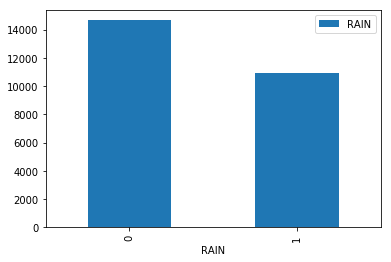

In [19]:
diff.plot(kind='bar')

### Total rain per day of the week

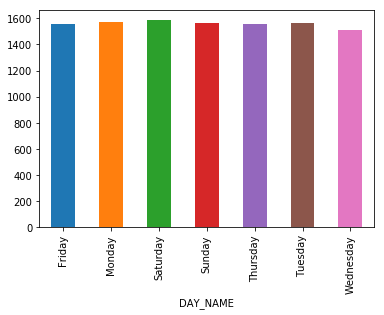

In [23]:
rain['DAY_NAME'].count().plot(kind='bar')

### Rain per month

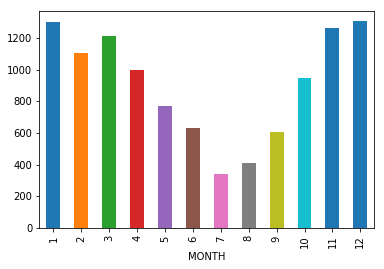

In [21]:
months_wet['MONTH'].count().plot(kind='bar')

### Temp diff per year (check that outlier)

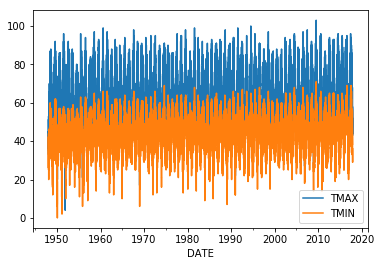

In [26]:
## if you don't want warnings, suppress them. This can kinda be a bad thing
import warnings
warnings.filterwarnings('ignore')

df.plot(x='DATE', y=['TMAX', 'TMIN'])

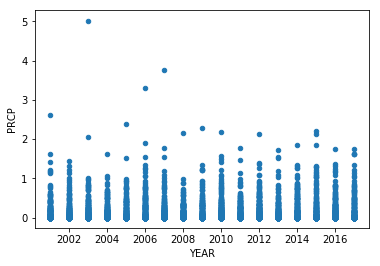

In [29]:
df[df.YEAR > 2000].plot(x='YEAR', y='PRCP', kind='scatter')

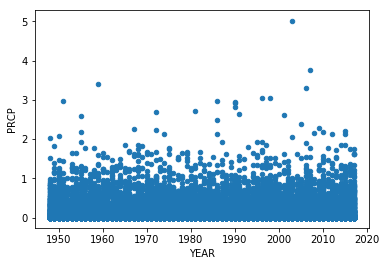

In [30]:
df.plot(x='YEAR', y='PRCP', kind='scatter')

#### Scatter plot showing precipitation per month for all years

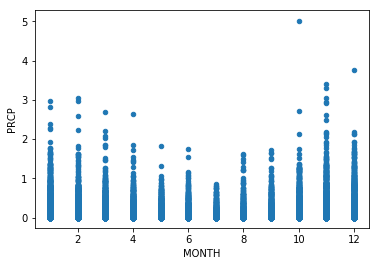

In [31]:
df[['MONTH', 'PRCP']].plot(x = 'MONTH', y = 'PRCP', kind= 'scatter')

### Average temp per year

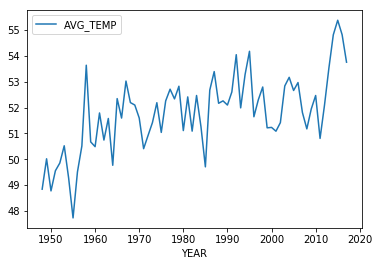

In [33]:
df[['YEAR', 'AVG_TEMP']].groupby('YEAR').mean().plot()

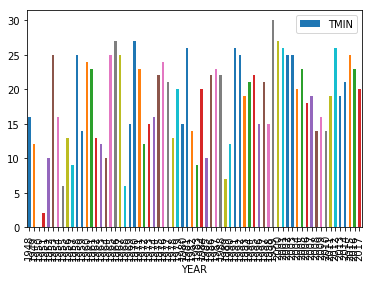

In [34]:
df[['YEAR', 'TMIN']].groupby(df.YEAR).min().plot(x='YEAR', y='TMIN', kind='bar')